# Курс ["Алгоритмы анализа данных"](https://gb.ru/lessons/177362)

# Урок 7. Классификация с помощью KNN. Кластеризация K-means

### Модель с урока

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

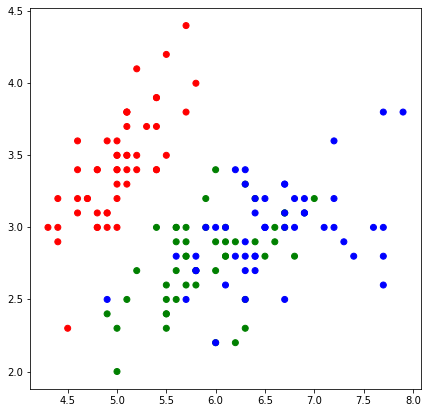

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [8]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


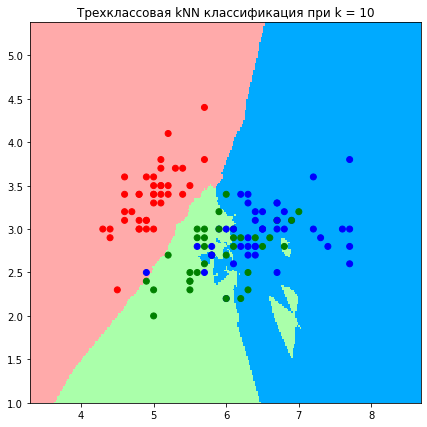

In [11]:
get_graph(X_train, y_train, k)

## Задание 1.

### К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

In [9]:
def weighing(x, test_distances):
    # словарь, где будем хранить веса классов
    classes = dict()

    for dist, class_ in test_distances:
        # если нет класса, то добавляем его в словарь
        if class_ not in classes:
            classes[class_] = 0 
        # прибавляем на каждой итерации вес
        w = 1 / (dist ** 2 + 1e-10)
        classes[class_] += w
    
    # итоговый класс выбираем по максимальному весу
    fin_class = sorted(classes, key=classes.get)[-1]
    return fin_class


In [10]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        neighbor = sorted(test_distances)[0:k]
        fin_class = weighing(x, neighbor)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(fin_class)
    return answers

Точность алгоритма при k = 10: 0.833


<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


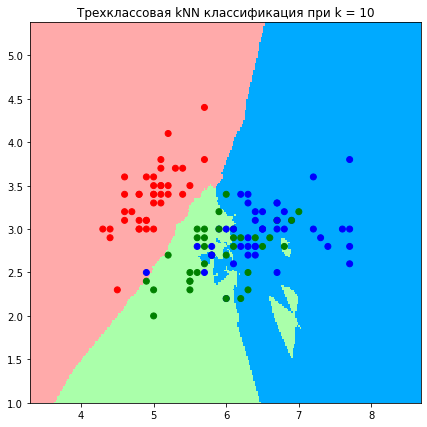

In [14]:
k = 10

y_pred = knn_w(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

In [16]:
X_test

array([[5.8, 4. ],
       [5.1, 2.5],
       [6.6, 3. ],
       [5.4, 3.9],
       [7.9, 3.8],
       [6.3, 3.3],
       [6.9, 3.1],
       [5.1, 3.8],
       [4.7, 3.2],
       [6.9, 3.2],
       [5.6, 2.7],
       [5.4, 3.9],
       [7.1, 3. ],
       [6.4, 3.2],
       [6. , 2.9],
       [4.4, 3.2],
       [5.8, 2.6],
       [5.6, 3. ],
       [5.4, 3.4],
       [5. , 3.2],
       [5.5, 2.6],
       [5.4, 3. ],
       [6.7, 3. ],
       [5. , 3.5],
       [7.2, 3.2],
       [5.7, 2.8],
       [5.5, 4.2],
       [5.1, 3.8],
       [6.1, 2.8],
       [6.3, 2.5]])

In [33]:
accs=[]
for k in range(1, 50):
    y_pred = knn(X_train, y_train, X_test, k)
    acc = accuracy(y_pred, y_test)
    y_pred_w = knn_w(X_train, y_train, X_test, k)
    acc_w = accuracy(y_pred_w, y_test)
    accs.append([k, acc, acc_w])

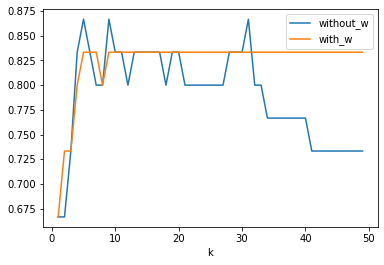

In [35]:
import pandas as pd

accs_df = pd.DataFrame(accs, columns=['k','without_w', 'with_w'])
accs_df.plot('k', y=['without_w', 'with_w'])

plt.show()

Без весов идет предсказуемое снижение точности из-за "дальних параметров", становящихся шумом. Аномалия с весами возле к=8 скорее всего связана с особенностями датасета - тестовые объекты одного класса оказались рядом со скоплением объектов другого класса.

## Задание 2. (*) 

### Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [36]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к классу, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if abs(np.sum((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [37]:
def square_mean(centroids, clusters):
    clusters_mean_dist = 0
    for class_, points in clusters.items():
        mean_dist = np.sum((points - centroids[class_]) ** 2) / len(points)
        clusters_mean_dist += mean_dist
    return clusters_mean_dist

In [38]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [39]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

In [40]:
max_iterations = 1
min_distance = 1e-4
num_clusters = np.arange(1, 11)
clusters_dist = []

for k in num_clusters:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    clusters_mean_dist = square_mean(centroids, clusters)
    clusters_dist.append(clusters_mean_dist)

Text(0, 0.5, 'Среднее внутрикластерное расстояние')

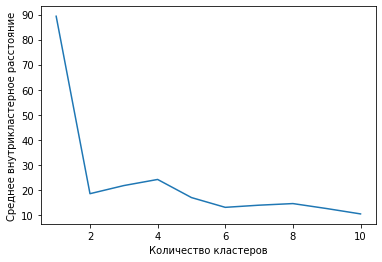

In [41]:
plt.plot(num_clusters, clusters_dist)
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее внутрикластерное расстояние')